In [1]:
using CSV;
using DataFrames;
using DelimitedFiles;
using LinearAlgebra;
using Plots

In [2]:
pwd()

"/Users/zifanyu/Documents/GitHub/BulkLMM.jl/analysis/HSNIH-Palmer"

In [3]:
results_BulkLMM = CSV.read("output/BulkLMM_results.csv", DataFrame; header = false) |> Matrix

102281×1 Matrix{Float64}:
 127.51567136674777
   0.010559416521699195
   1.9534440202696381
   0.19791149361309895
   1.99014752522033
   1.3949630870987864
   1.5580444787056806
   1.4317798884960893
   0.1991561950431669
   0.6661287613014163
   0.8620160909063468
   1.5588822617692375
   0.4606112765647173
   ⋮
   0.10570917184297791
   0.10767390399041225
   0.3028964182266698
   0.19502424514896674
   0.21034782392985038
   0.24447842551619872
   0.21184564331606448
   0.23395216440781724
   0.16102104475656517
   0.15539020759148023
   0.1318961982216523
   0.1761501762667499

In [4]:
results_GEMMA = readdlm("output/gemma_results.txt.assoc.txt", '\t')

102280×10 Matrix{Any}:
   "chr"  "rs"                "ps"   "n_miss"  …   "l_mle"     "p_lrt"
 -9       "chr1:759319"     -9      0             0.0102581   0.0027058
 -9       "chr1:1154955"    -9      0             0.00803717  0.339739
 -9       "chr1:1649028"    -9      0             0.010183    0.00246692
 -9       "chr1:1649332"    -9      0             0.00981839  0.0112586
 -9       "chr1:1651967"    -9      0          …  0.0097179   0.0073924
 -9       "chr1:1671721"    -9      0             0.00985885  0.0102347
 -9       "chr1:1685077"    -9      0             0.00758233  0.338225
 -9       "chr1:1691966"    -9      0             0.0139525   0.0798655
 -9       "chr1:1754257"    -9      0             0.0147275   0.0463252
 -9       "chr1:1755622"    -9      0          …  0.00957821  0.00737652
 -9       "chr1:1779904"    -9      0             0.00596057  0.145273
 -9       "chr1:1782572"    -9      0             0.014643    0.045462
  ⋮                                         

In [5]:
results_gemma_nullLL = -15719.8

-15719.8

In [6]:
log(0.0102581)

-4.579687641573592

In [7]:
log10(10)

1.0

In [8]:
2*log(10)

4.605170185988092

In [9]:
function p2lod(pval::Float64)
    
    lrs = -log10(pval)*2*log(10)
    lod = lrs/(2*log(10))
    
    # return lrs
    return lod

end

p2lod (generic function with 1 method)

In [10]:
lods_gemma = map(x -> p2lod(x), results_GEMMA[2:end, 10]);

In [11]:
lods_BulkLMM = results_BulkLMM[3:end, 1];

In [12]:
summary = hcat(lods_gemma, lods_BulkLMM);
summary[1:6, :]

6×2 Matrix{Float64}:
 2.5677    1.95344
 0.468855  0.197911
 2.60785   1.99015
 1.94852   1.39496
 2.13121   1.55804
 1.98993   1.43178

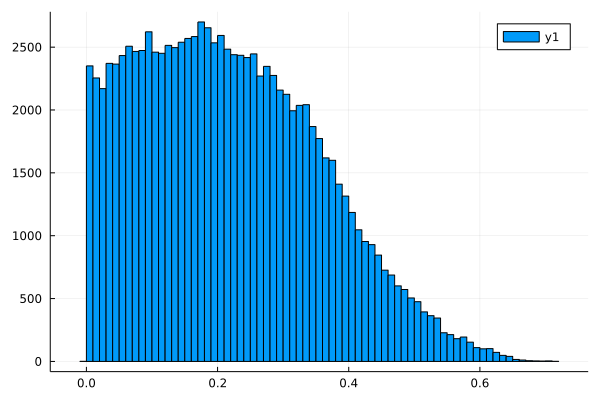

In [13]:
histogram(lods_gemma .- lods_BulkLMM)

In [14]:
thr = 3.0

3.0

In [15]:
lods_BulkLMM[lods_BulkLMM .> thr]

6-element Vector{Float64}:
 3.076760458662261
 3.1808702870693564
 3.212289714830687
 3.2808192698589966
 3.011824418149289
 3.1575146035897332

In [16]:
sig_BulkLMM = findall(x -> (x>thr), lods_BulkLMM)

6-element Vector{Int64}:
 83887
 83893
 83904
 83915
 83918
 83922

In [17]:
sig_gemma = findall(x -> (x>thr), lods_gemma)

47-element Vector{Int64}:
  2269
 20089
 20096
 20118
 20122
 20178
 20184
 20187
 20188
 23100
 23118
 48823
 76536
     ⋮
 84263
 84266
 84269
 84275
 84468
 84476
 85249
 85252
 85259
 85313
 89852
 89855

In [18]:
map(x -> x in sig_gemma, sig_BulkLMM) 

6-element Vector{Bool}:
 1
 1
 1
 1
 1
 1